In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
#from keras.layers import Add,concatenate, merge
#from keras.engine import Input, Model
from sklearn.model_selection import train_test_split

In [3]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd 'drive/My Drive/ECE 657/Part-2/'

/content/drive/My Drive/ECE 657/Part-2


In [28]:
train = pd.read_csv('train.csv')
test = pd.read_csv('testX.csv')
train.describe()

,Id,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,39999.500000,2.002933,0.000483,0.006067,0.033700,0.090450,0.241383,0.392517,0.777333,2.158300,5.597000,14.485433,32.866333,45.783900,51.985883,50.779350,50.425750,53.686350,51.371150,40.467633,25.962700,10.281083,4.034833,1.929250,1.148100,0.842217,0.47675,0.262000,0.08960,0.015167,0.004783,0.020917,0.102850,0.339433,0.741917,2.058883,7.226483,17.394200,32.014417,53.019567,...,92.459967,90.458233,79.041600,62.473383,46.021650,44.367617,47.964333,38.793683,22.335200,9.189950,3.814733,0.622083,0.024617,0.220950,1.03375,4.379250,12.673967,21.02115,21.219867,17.159950,22.219717,30.688333,41.950650,51.574867,52.491717,46.289000,42.470617,45.183467,50.020433,46.359133,34.545900,23.297883,16.652150,17.953617,22.969333,17.967350,8.525333,2.753883,0.832950,0.072850
std,17320.652413,1.415000,0.061507,0.292286,1.178115,2.306445,4.365543,5.702057,8.023953,13.942884,23.572943,38.252977,57.692077,65.947637,68.565341,67.919718,67.397257,69.421676,67.915419,62.725940,51.620728,32.300648,20.015361,13.871987,10.593331,9.214058,7.01254,5.295104,2.78752,1.048501,0.361104,1.133843,3.104964,6.149413,9.589874,15.716790,29.936239,47.877737,65.585449,82.247678,...,100.881732,99.700169,95.036194,88.766993,78.686045,77.236284,83.267721,74.407819,55.982185,37.736031,24.425300,8.175978,1.009238,4.416291,10.07838,20.894199,37.020302,49.07243,48.312498,42.208942,48.438714,55.116266,62.242895,68.555227,69.759801,67.367902,66.182219,66.754477,68.685723,66.060666,57.569109,48.952580,42.147395,43.985951,51.856475,45.225807,29.529071,17.396211,9.263115,2.131444
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.

In [6]:
train['Label'].unique()

array([4, 0, 1, 2, 3])

In [7]:
batch_size = 1024
num_classes = 5
epochs = 300
img_rows, img_cols = 28, 28

x_train = train.drop(['Label', 'Id'], axis=1).to_numpy()
y_train = train['Label'].to_numpy()
x_test = test.drop(['Id'], axis = 1).to_numpy()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes)

print(x_val.shape)
print(y_val)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_val /= 255

(6000, 28, 28, 1)
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


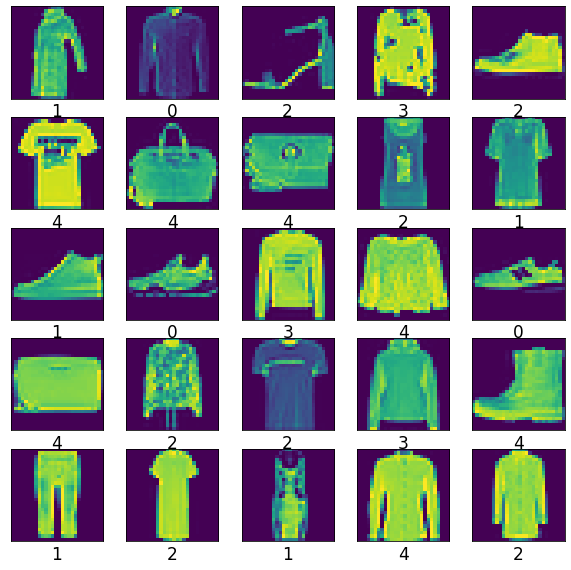

In [46]:
plt.figure(figsize=(10,20))
for i in range(25):
  plt.subplot(10, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i].reshape(28,28))
  plt.xlabel(y_train[i].argmax(axis = -1))
plt.show()

In [0]:
print(x_train.shape)
print(y_train.shape)

(54000, 28, 28, 1)
(54000, 5)


In [18]:
#92.33 Validation Accuracy

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', padding = 'same', input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', padding = 'same'))

model.add(MaxPooling2D(pool_size=(2,2), strides=1))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding = 'same'))

model.add(MaxPooling2D(pool_size=(2,2), strides=1))

model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.0008), metrics = ['accuracy'])

import tensorflow as tf
tf.keras.utils.plot_model(
    model, to_file='model_CNN.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)

model.summary()

history = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 64)               

In [19]:
import time
start = time.time()
score = model.evaluate(x_val, y_val, verbose = 0)
end = time.time()
print("Time taken for testing data: ", end-start)
print("Validation Accuracy: ", score)

Time taken for testing data:  0.4109320640563965
Validation Accuracy:  [0.22977684438228607, 0.9233333468437195]


In [20]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

# predict probabilities for test set
yhat_probs = model.predict(x_val, verbose=0)

yhat_classes = yhat_probs.argmax(axis=-1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_val.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_val, yhat_probs)
print('ROC AUC: %f' % auc)

matrix = multilabel_confusion_matrix(y_val.argmax(axis=-1), yhat_classes, labels = [0,1,2,3,4])
print(matrix)

#Reference:
#https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

Accuracy: 0.923333
Precision: 0.923333
Recall: 0.923333
F1 score: 0.923333
Cohens kappa: 0.904156
ROC AUC: 0.993406
[[[4760   50]
  [  41 1149]]

 [[4656  114]
  [ 100 1130]]

 [[4696  122]
  [ 132 1050]]

 [[4708  117]
  [ 127 1048]]

 [[4720   57]
  [  60 1163]]]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


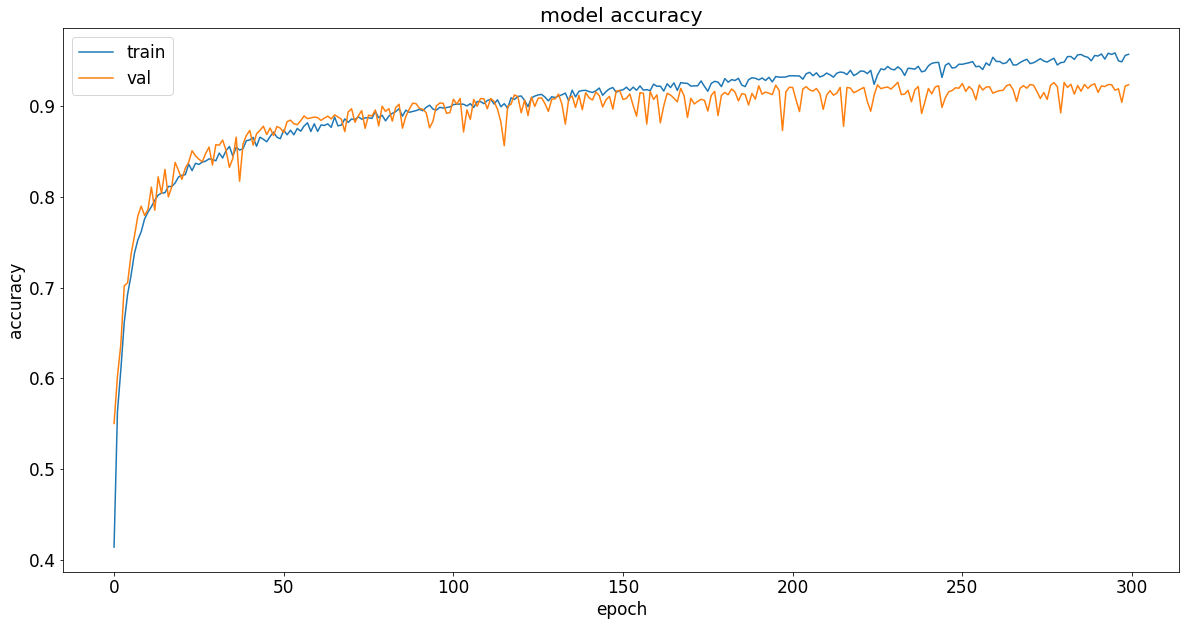

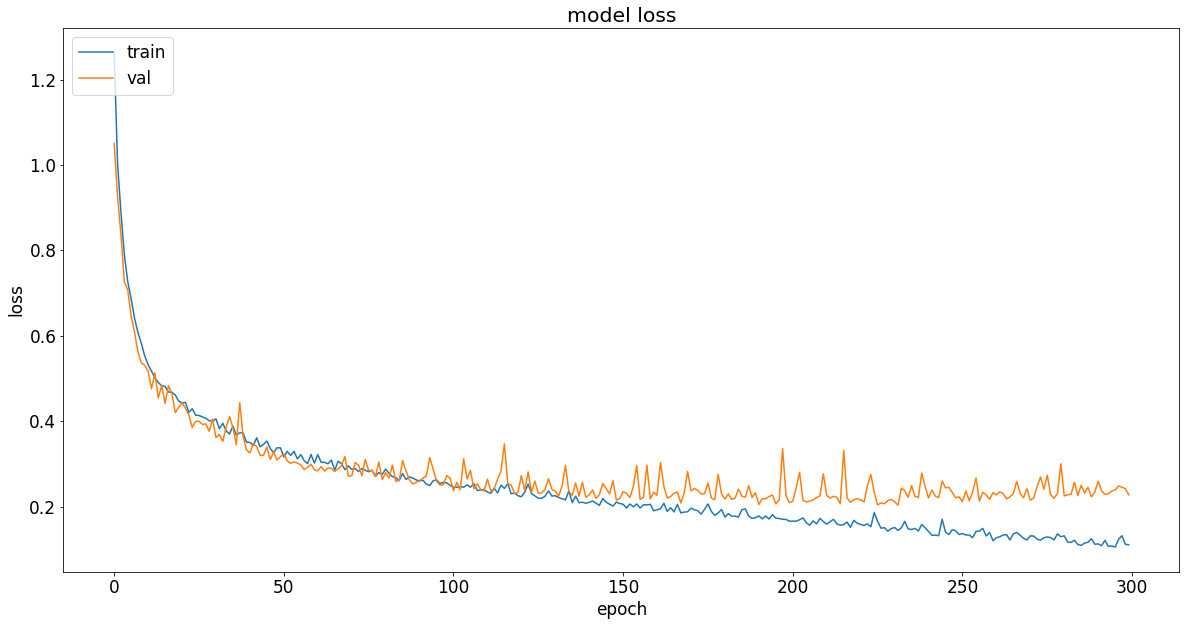

In [21]:
#plt.rcParams['xtick.labelsize'] = 17
#plt.rcParams['ytick.labelsize'] = 17
#plt.rcParams['xlabel.fontsize'] = 17
plt.rcParams['font.size'] = 17
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
x_test = test.drop(['Id'], axis = 1).to_numpy()
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test /= 255
y_sol = model.predict(x_test)
y_sol = y_sol.argmax(axis=-1)
y_sol

array([4, 4, 1, ..., 3, 2, 2])

In [0]:
df_solution = pd.DataFrame(np.arange(0, x_test.shape[0]), columns=['Id'])
df_solution['Label'] = y_sol

In [24]:
df_solution

,Id,Label
0,0,4
1,1,4
2,2,1
3,3,1
4,4,3
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,2
